In [1]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

df_ener_2019 = pd.read_csv('data/part-energies/xls/part-energies-2019.xls', sep='\t', encoding='latin-1', index_col=False, usecols=lambda x: x not in [' Stockage batterie', 'DÈstockage batterie', 'Eolien terrestre', 'Eolien offshore'])
df_ener_2020 = pd.read_csv('data/part-energies/xls/part-energies-2020.xls', sep='\t', encoding='latin-1', index_col=False,usecols=lambda x: x not in [' Stockage batterie', 'DÈstockage batterie', 'Eolien terrestre', 'Eolien offshore'])
df_ener_2021 = pd.read_csv('data/part-energies/xls/part-energies-2021-debut-2022.xls', sep='\t', encoding='latin-1', index_col=False,usecols=lambda x: x not in [' Stockage batterie', 'DÈstockage batterie', 'Eolien terrestre', 'Eolien offshore'])
df_ener_2022 = pd.read_csv('data/part-energies/xls/part-energies-fin-2022.xls', sep='\t', encoding='latin-1', index_col=False,usecols=lambda x: x not in [' Stockage batterie', 'DÈstockage batterie', 'Eolien terrestre', 'Eolien offshore'])

/var/folders/4d/zt9y765s59xg9rkbzf15mwhc0000gn/T/ipykernel_44595/1489293955.py:8: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ener_2021 = pd.read_csv('data/part-energies/xls/part-energies-2021-debut-2022.xls', sep='\t', encoding='latin-1', index_col=False,usecols=lambda x: x not in [' Stockage batterie', 'DÈstockage batterie', 'Eolien terrestre', 'Eolien offshore'])
/var/folders/4d/zt9y765s59xg9rkbzf15mwhc0000gn/T/ipykernel_44595/1489293955.py:9: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ener_2022 = pd.read_csv('data/part-energies/xls/part-energies-fin-2022.xls', sep='\t', encoding='latin-1', index_col=False,usecols=lambda x: x not in [' Stockage batterie', 'DÈstockage batterie', 'Eolien terrestre', 'Eolien offshore'])


Dans un premier temps nous allons vérifier que les données de chaque dataset sont bien de la même forme.

In [2]:
df_ener_2019.head()

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Déstockage batterie
0,France,Données définitives,2019-01-01,00:00,64207.0,64200.0,63800.0,146.0,11.0,3430.0,...,2482.0,832.0,112.0,3513.0,1080.0,1.0,555.0,322.0,295.0,ND
1,France,Données définitives,2019-01-01,00:15,NaN,63450.0,63000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ND
2,France,Données définitives,2019-01-01,00:30,63162.0,62700.0,62200.0,149.0,12.0,3029.0,...,2550.0,378.0,96.0,3454.0,1342.0,167.0,562.0,314.0,292.0,ND
3,France,Données définitives,2019-01-01,00:45,NaN,61600.0,61200.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ND
4,France,Données définitives,2019-01-01,01:00,60923.0,60500.0,60200.0,149.0,12.0,2858.0,...,2566.0,191.0,98.0,3369.0,765.0,127.0,559.0,310.0,291.0,ND


In [3]:
df_ener_2020.head()

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Déstockage batterie
0,France,Données définitives,2020-01-01,00:00,67068.0,68000.0,65800.0,300.0,14.0,6515.0,...,2374.0,4042.0,95.0,6388.0,2452.0,244.0,517.0,343.0,325.0,ND
1,France,Données définitives,2020-01-01,00:15,NaN,67300.0,65300.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ND
2,France,Données définitives,2020-01-01,00:30,66103.0,66600.0,64800.0,107.0,13.0,6692.0,...,2381.0,4209.0,98.0,6379.0,3111.0,97.0,525.0,344.0,325.0,ND
3,France,Données définitives,2020-01-01,00:45,NaN,65750.0,64000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ND
4,France,Données définitives,2020-01-01,01:00,63943.0,64900.0,63200.0,106.0,13.0,6257.0,...,2391.0,3765.0,97.0,6155.0,2654.0,324.0,524.0,338.0,325.0,ND


In [4]:
df_ener_2021.head()

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Déstockage batterie
0,France,Données consolidées,2021-01-01,00:00,67010.0,67000.0,66800.0,94.0,7.0,5553.0,...,2254.0,3199.0,96.0,5105.0,1363.0,988.0,512.0,286.0,314.0,NaN
1,France,Données consolidées,2021-01-01,00:15,NaN,66500.0,66300.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Données consolidées,2021-01-01,00:30,67071.0,66000.0,65800.0,97.0,7.0,5637.0,...,2351.0,3190.0,92.0,5031.0,1275.0,1021.0,521.0,296.0,331.0,NaN
3,France,Données consolidées,2021-01-01,00:45,NaN,65150.0,64900.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France,Données consolidées,2021-01-01,01:00,65052.0,64300.0,64000.0,97.0,7.0,4515.0,...,2365.0,2055.0,91.0,4930.0,823.0,469.0,520.0,296.0,331.0,NaN


In [5]:
df_ener_2022.head()

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Déstockage batterie
0,France,Données temps réel,2022-06-01,00:00,44940.0,44800.0,45100.0,144.0,0.0,3596.0,...,429.0,3168.0,0.0,4331.0,1054.0,1677.0,170.0,584.0,286.0,ND
1,France,Données temps réel,2022-06-01,00:15,43967.0,43700.0,43900.0,144.0,0.0,3716.0,...,423.0,3294.0,0.0,4163.0,1419.0,581.0,171.0,560.0,276.0,ND
2,France,Données temps réel,2022-06-01,00:30,42514.0,42600.0,42700.0,142.0,0.0,2880.0,...,427.0,2454.0,0.0,4187.0,1280.0,530.0,169.0,561.0,276.0,ND
3,France,Données temps réel,2022-06-01,00:45,41073.0,41450.0,41600.0,143.0,0.0,2699.0,...,421.0,2280.0,0.0,4054.0,1120.0,361.0,170.0,563.0,276.0,ND
4,France,Données temps réel,2022-06-01,01:00,40359.0,40300.0,40500.0,144.0,3.0,2718.0,...,423.0,2296.0,0.0,4068.0,1101.0,373.0,170.0,563.0,276.0,ND


On peut dors et déjà remarquer que pour les données de 2019, 2020, 2021 et début de 2022 il y a des lignes inutiles à savoir celles correspondantes à chaque 15 et 45 minutes de chaque heures. Nous allons les supprimer.

In [6]:
df_concat = pd.concat([df_ener_2019, df_ener_2020, df_ener_2021], ignore_index=True)
df_concat.head()

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Déstockage batterie
0,France,Données définitives,2019-01-01,00:00,64207.0,64200.0,63800.0,146.0,11.0,3430.0,...,2482.0,832.0,112.0,3513.0,1080.0,1.0,555.0,322.0,295.0,ND
1,France,Données définitives,2019-01-01,00:15,NaN,63450.0,63000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ND
2,France,Données définitives,2019-01-01,00:30,63162.0,62700.0,62200.0,149.0,12.0,3029.0,...,2550.0,378.0,96.0,3454.0,1342.0,167.0,562.0,314.0,292.0,ND
3,France,Données définitives,2019-01-01,00:45,NaN,61600.0,61200.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ND
4,France,Données définitives,2019-01-01,01:00,60923.0,60500.0,60200.0,149.0,12.0,2858.0,...,2566.0,191.0,98.0,3369.0,765.0,127.0,559.0,310.0,291.0,ND


In [7]:
df_concat = df_concat.loc[(~df_concat['Consommation'].isnull())]
df_concat.head()

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Déstockage batterie
0,France,Données définitives,2019-01-01,00:00,64207.0,64200.0,63800.0,146.0,11.0,3430.0,...,2482.0,832.0,112.0,3513.0,1080.0,1.0,555.0,322.0,295.0,ND
2,France,Données définitives,2019-01-01,00:30,63162.0,62700.0,62200.0,149.0,12.0,3029.0,...,2550.0,378.0,96.0,3454.0,1342.0,167.0,562.0,314.0,292.0,ND
4,France,Données définitives,2019-01-01,01:00,60923.0,60500.0,60200.0,149.0,12.0,2858.0,...,2566.0,191.0,98.0,3369.0,765.0,127.0,559.0,310.0,291.0,ND
6,France,Données définitives,2019-01-01,01:30,60729.0,61100.0,60900.0,147.0,10.0,2866.0,...,2567.0,200.0,95.0,3254.0,684.0,147.0,565.0,306.0,291.0,ND
8,France,Données définitives,2019-01-01,02:00,60127.0,60800.0,60400.0,146.0,13.0,2825.0,...,2564.0,162.0,94.0,3126.0,787.0,0.0,566.0,312.0,289.0,ND


In [8]:
# Looking for duplicated values

print("Number of duplicated values: " + str(df_concat.duplicated().sum()))

Number of duplicated values: 0


In [9]:
# Feature engineering for energies

fioul_feats = ['Fioul', 'Fioul - TAC', 'Fioul - Cogén.', 'Fioul - Autres']
gaz_feats = ['Gaz', 'Gaz - TAC', 'Gaz - Cogén.', 'Gaz - CCG', 'Gaz - Autres']
hydrauliques_feats = ['Hydraulique', 'Hydraulique - Fil de l?eau + éclusée', 'Hydraulique - Lacs', 'Hydraulique - STEP turbinage']
bioenergies_feats = ['Bioénergies - Déchets', 'Bioénergies - Biomasse','Bioénergies - Biogaz', 'Bioénergies']

In [10]:
# Aggregating same feats that was in different columns
def sum_columns_values(df, columns, new_name):
    df_clean = df.copy()
    col = df.loc[:, columns].sum(axis=1)
    df_clean.drop(columns, axis=1, inplace=True)
    df_clean.insert(1, new_name, col)
    return df_clean

df_concat_cleaned = df_concat.copy()
df_concat_cleaned = sum_columns_values(df_concat_cleaned, fioul_feats, "Fioul")
df_concat_cleaned = sum_columns_values(df_concat_cleaned, gaz_feats, "Gaz")
df_concat_cleaned = sum_columns_values(df_concat_cleaned, hydrauliques_feats, "Hydraulique")
df_concat_cleaned = sum_columns_values(df_concat_cleaned, bioenergies_feats, "Bioénergies")
df_concat_cleaned.head()

,Périmètre,Bioénergies,Hydraulique,Gaz,Fioul,Nature,Date,Heures,Consommation,Prévision J-1,...,Solaire,Pompage,Ech. physiques,Taux de Co2,Ech. comm. Angleterre,Ech. comm. Espagne,Ech. comm. Italie,Ech. comm. Suisse,Ech. comm. Allemagne-Belgique,Déstockage batterie
0,France,2344.0,9187.0,6860.0,273.0,Données définitives,2019-01-01,00:00,64207.0,64200.0,...,0.0,-1692.0,-545.0,25.0,-1555.0,-2400.0,456.0,-2288.0,3765.0,ND
2,France,2336.0,9926.0,6057.0,281.0,Données définitives,2019-01-01,00:30,63162.0,62700.0,...,0.0,-1506.0,-2581.0,23.0,-1555.0,-2400.0,456.0,-2288.0,3765.0,ND
4,France,2320.0,8522.0,5717.0,281.0,Données définitives,2019-01-01,01:00,60923.0,60500.0,...,0.0,-1507.0,-2740.0,22.0,-1555.0,-2400.0,709.0,-2353.0,3130.0,ND
6,France,2323.0,8170.0,5732.0,279.0,Données définitives,2019-01-01,01:30,60729.0,61100.0,...,0.0,-1662.0,-2860.0,22.0,-1555.0,-2400.0,709.0,-2353.0,3130.0,ND
8,France,2334.0,7826.0,5649.0,277.0,Données définitives,2019-01-01,02:00,60127.0,60800.0,...,0.0,-1745.0,-2789.0,22.0,-1506.0,-2400.0,52.0,-2336.0,3587.0,ND


In [11]:
# Lookign for missing values
energies = ["Fioul","Charbon","Gaz","Nucléaire","Eolien","Solaire","Hydraulique","Bioénergies"]

cas_missing = df_concat_cleaned.loc[:, energies].isna().sum()
cas_missing

Fioul          0
Charbon        0
Gaz            0
Nucléaire      0
Eolien         0
Solaire        0
Hydraulique    0
Bioénergies    0
dtype: int64

<AxesSubplot: >

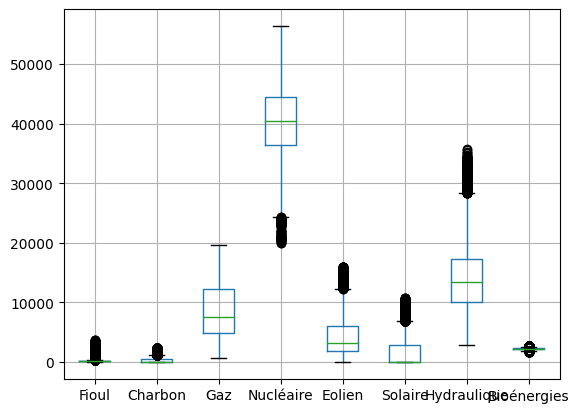

In [12]:
# Looking for outliers

df_concat_cleaned.loc[:, energies].boxplot()

On ne remarque aucune donnée réèlement écartée de la masse de valeurs pour chaque variable, nous allons donc considérer que les données sont propres.

Il faut maintenant ajouter une temporalité plus précise à nos données, nous allons concaténer puis transformer en variable de type date les variables *Date* et *Heures*, ensuite assigner cette nouvelle variable en tant qu'index de chaque ligne.

In [13]:
dates = pd.to_datetime(df_concat_cleaned['Date'] + df_concat_cleaned['Heures'], format='%Y-%m-%d%H:%M')

df_finish = df_concat_cleaned.copy()
df_finish.insert(1, "FullDate", dates)
df_finish = df_finish.set_index('FullDate')

Les données étant prêtes, nous pouvons donc afficher l'area plot pour l'entièreté de notre dataset afin de voir la répartition de la production d'énergie dans le temps.

In [14]:
covid_phases = [
    {
        'min': "2020-10-30",
        'max': "2020-11-28",
        'color': "red",
        'label': "Confinement total 1",
    },
    {
        'min': "2021-01-18",
        'max': "2021-01-18",
        'color': "green",
        'label': "Couvre feu 1",
    },
    {
        'min': "2021-03-20",
        'max': "2021-04-03",
        'color': "blue",
        'label': "Confinement partiel 1",
    },
    {
        'min': "2021-04-03",
        'max': "2021-06-09",
        'color': "red",
        'label': "Confinement total 2",
    },
    {
        'min': "2021-08-09",
        'max': "2021-08-09",
        'color': "green",
        'label': "Passe sanitaire",
    }
]

df_finish.loc[:, energies].plot.area(title='Répartition de la production d\'énergie', xlabel='Date', ylabel='Part en MW')
for covid_phase in covid_phases:
    plt.axvspan(covid_phase['min'], covid_phase['max'], color=covid_phase['color'], label=covid_phase['label'], alpha=0.3)

Pour une vision plus lisible, un autre graphique doit présenter la part de la production à un instant T en pourcentage.

In [15]:
def get_percentages(row):
    total = int(row.sum(axis=1).values[0])
    return row.applymap(lambda p: p/total*100)

target_date = "2022-01-12"
target_hour = "00:00"

get_percentages(df_finish.loc[((df_finish['Date'] == target_date) & (df_finish['Heures'] == target_hour)), energies]).plot.bar(title="Répartition de la production d'énergie", xlabel='Date', ylabel="Part en %", stacked=True)

<AxesSubplot: title={'center': "Répartition de la production d'énergie"}, xlabel='Date', ylabel='Part en %'>